In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

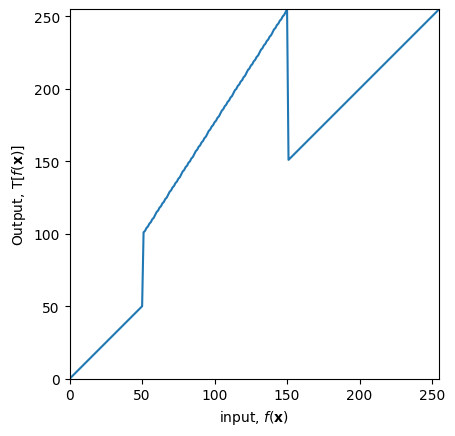

In [2]:
c = np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])
t1 = np.linspace(0,c[0,1], c[0,0]+1).astype('uint8')
t2 = np.linspace(c[1,1]+1,c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1]+1,c[4,1], c[4,0]-c[3,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


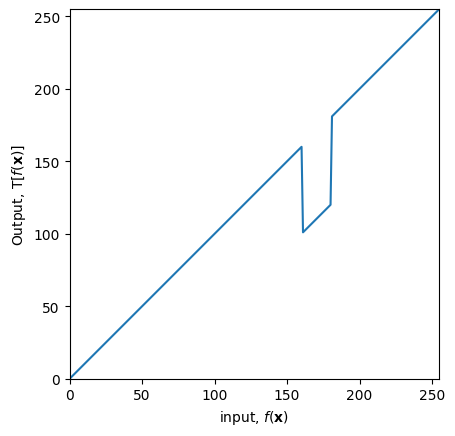

In [3]:
c = np.array([(0,0),(160,160),(160,100),(180,120),(180,180),(255,255)])
t1 = np.linspace(c[0,1],c[1,1], c[1,0]+1).astype('uint8')
t2 = np.linspace(c[2,1]+1,c[3,1], c[3,0] - c[2,0]).astype('uint8')
t3 = np.linspace(c[4,1]+1,c[5,1], c[5,0]-c[4,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

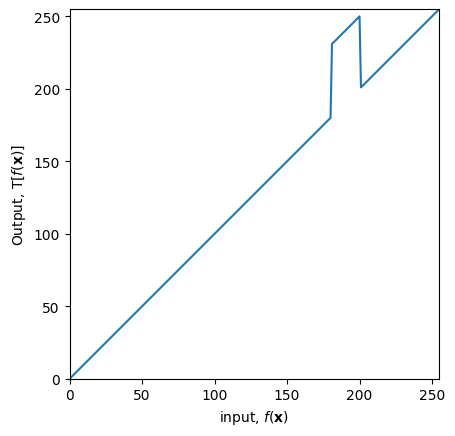

In [4]:
c = np.array([(0,0),(180,180),(180,230),(200,250),(200,200),(255,255)])
t1 = np.linspace(c[0,1],c[1,1], c[1,0]+1).astype('uint8')
t2 = np.linspace(c[2,1]+1,c[3,1], c[3,0] - c[2,0]).astype('uint8')
t3 = np.linspace(c[4,1]+1,c[5,1], c[5,0]-c[4,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
img_orig = cv.imread('highlights_and_shadows.jpg')
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
l, a, b = cv.split(img_lab)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(l,table)
img_gamma = cv.merge((img_gamma,a,b))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2BGR)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
cv.imshow('Image', img_gamma)
cv.waitKey(0)
cv.destroyAllWindows()



In [6]:
def incr_vibr(x,a,sigma):
    f = x + (a*128 * np.e**(-(x-128)**2/(2*sigma**2)))
    return min(f,255)

print(incr_vibr(100,2000,1000))

255


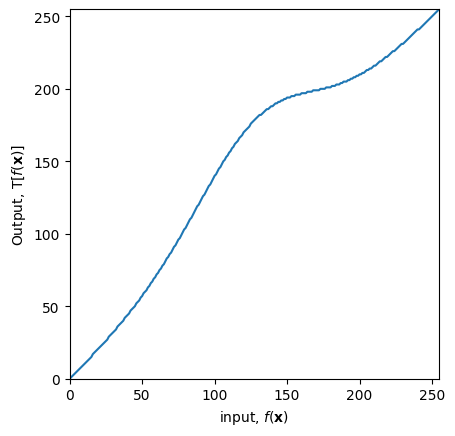

In [7]:
sigma = 40
a = 0.4
img_orig = cv.imread('spider.png')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v =   cv.split(img_hsv)

for i in range(len(s)):
    for j in range(len(s[0])):
        s[i][j] = incr_vibr(s[i][j], a, sigma)

img_final = cv.merge((h,s,v))
img_final = cv.cvtColor(img_final, cv.COLOR_HSV2BGR)

t = np.linspace(0,255, 256).astype('uint8')
for val_index in range(len(t)):
    t[val_index] = incr_vibr(t[val_index], a, sigma)

fig, ax = plt.subplots()
ax.plot(t)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()


cv.imshow('Image', img_orig)
cv.waitKey(0)
cv.imshow('Image', img_final)
cv.waitKey(0)
cv.destroyAllWindows()



In [8]:
def hist_equal(img):
    '''insert grayscale image and it returns the transformed image and the 
    object transform(the function of the transformation used)'''
    image_transformed = img.copy()
    
    length = len(img[0])
    height = len(img)
    
    hist, bins = np.histogram(img.ravel(), 256, [0,256])

    transform = []
    cumsum = 0

    for val in range(len(hist)):
        cumsum+= hist[val]
        transform.append(np.round(cumsum/(length*height)*255))

    for i in range(height):
        for j in range(length):
            image_transformed[i][j] = transform[img[i][j]]

    transform = np.array(transform)
    
    return image_transformed, transform 


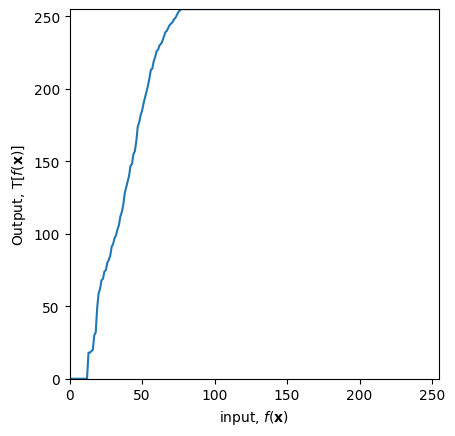

In [9]:
img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

image_transformed, transform = hist_equal(img)

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img)
cv.waitKey(0)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
img_orig = cv.imread('jeniffer.jpg')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
h, s, v = cv.split(img_hsv)
ret, mask = cv.threshold(s, 15, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
foreground = cv.bitwise_and(img_gray,img_gray, mask= mask)
background = cv.bitwise_and(img_gray,img_gray, mask= mask_inv)



# foreground_new = cv.cvtColor(foreground, cv.COLOR_BGR2RGB)
# r, g, b= cv.split(foreground_new)


def hist_equal(img):
    '''insert grayscale image and it returns the transformed image and the 
    object transform(the function of the transformation used)'''
    image_transformed = img.copy()
    
    length = img.shape[1]
    height = img.shape[0]
    
    total = np.count_nonzero(img)
    
    hist, bins = np.histogram(img.ravel(), 256, [0,256])

    transform = [0]
    cumsum = 0

    # for val in range(1,len(hist)):
    #     cumsum+= hist[val]
    #     transform.append(np.round(cumsum/(total)*255))
    
    transform = (hist.cumsum()-hist[0])/(total)*255
    print(transform)

    for i in range(height):
        for j in range(length):
            image_transformed[i][j] = transform[img[i][j]]

    transform = np.array(transform)
    
    return image_transformed, transform 

    

# fortranformr, transformr= hist_equal(r)
# fortranformg, transformg = hist_equal(g)
# fortranformb, transformb = hist_equal(b)

# foreground_new = cv.merge((fortranformr, fortranformg, fortranformb ))
# foreground_new = cv.cvtColor(foreground_new, cv.COLOR_RGB2BGR)
foreground_new, transform = hist_equal(foreground)


final_img = cv.add(foreground_new,background)

# Naming a windowm
cv.namedWindow("Resized_Window", cv.WINDOW_NORMAL)

  
# Using resizeWindow()
cv.resizeWindow("Resized_Window", 2160, 3840)
# cv.imshow('Resized_Window', img_orig)
# cv.waitKey(0)
cv.imshow('Resized_Window', h)
cv.waitKey(0)
cv.imshow('Resized_Window', s)
cv.waitKey(0)
cv.imshow('Resized_Window', v)
cv.waitKey(0)
cv.imshow('Resized_Window', foreground)
cv.waitKey(0)
cv.imshow('Resized_Window', foreground_new)
cv.waitKey(0)
cv.imshow('Resized_Window', final_img)
cv.namedWindow("Original image", cv.WINDOW_NORMAL)
cv.resizeWindow("Original image", 2160, 3840)
cv.imshow('Original image',img_gray )
cv.waitKey(0)
cv.destroyAllWindows()

[0.00000000e+00 1.82258479e-01 6.07842883e-01 8.00295001e-01
 1.01492772e+00 1.40898735e+00 1.66297884e+00 2.13575602e+00
 2.44939917e+00 3.05469364e+00 3.46055147e+00 3.93568828e+00
 4.67595408e+00 5.21810463e+00 5.97281141e+00 6.60349560e+00
 7.38245947e+00 8.09393767e+00 8.82504807e+00 9.72756261e+00
 1.05381456e+01 1.16124419e+01 1.25238286e+01 1.34642862e+01
 1.48866763e+01 1.58918823e+01 1.78807744e+01 1.89428949e+01
 2.19016928e+01 2.29997742e+01 2.41431607e+01 2.72899746e+01
 2.84737580e+01 3.08063079e+01 3.20488936e+01 3.38543002e+01
 3.51340737e+01 3.64308367e+01 3.81320417e+01 3.94674083e+01
 4.11453001e+01 4.25534379e+01 4.39644074e+01 4.57547123e+01
 4.72361878e+01 4.92049758e+01 5.06159452e+01 5.26699634e+01
 5.41008482e+01 5.55355084e+01 5.74127424e+01 5.88397574e+01
 6.04283604e+01 6.18460313e+01 6.34995716e+01 6.48856232e+01
 6.62267474e+01 6.77491862e+01 6.90775683e+01 7.05261032e+01
 7.18601484e+01 7.31688039e+01 7.45690134e+01 7.58788016e+01
 7.72782560e+01 7.856208

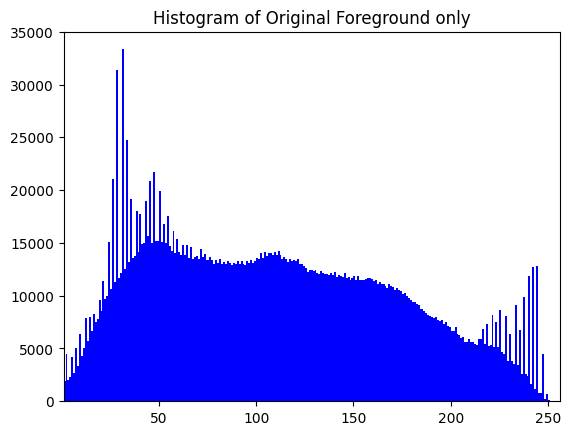

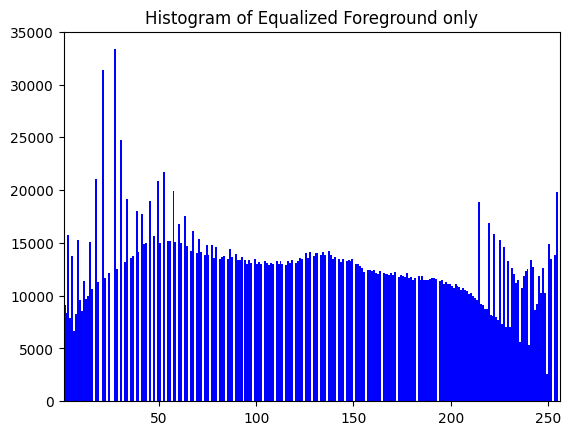

In [11]:
plt.hist(foreground.flatten(), 255, [ 1,256] , color = 'b')
plt.xlim([1,256])
plt.title('Histogram of Original Foreground only')
plt.show()


plt.hist(foreground_new.flatten(), 255, [ 1,256] , color = 'b')
plt.xlim([1,256])
plt.title('Histogram of Equalized Foreground only')
plt.show()






In [12]:
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

kernel = np.array([(-1, -2,-1), (0, 0, 0), (1, 2, 1)], dtype = 'float')
imgc = cv.filter2D(img, -1, kernel)
print(img[:3])
print(imgc[:3])
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img)
cv.waitKey(0)
cv.imshow('Image', imgc)
cv.waitKey(0)
cv.destroyAllWindows()
print(kernel.shape[0])

[[ 7  7  7 ...  9  9  9]
 [ 7  7  8 ... 10 10  9]
 [ 7  7  8 ...  8  9  9]]
[[0 0 0 ... 0 0 0]
 [0 1 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3


In [13]:
img_length = img.shape[1]
img_height = img.shape[0]
ker_length = kernel.shape[1]
ker_height = kernel.shape[0]

img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
kernel = np.array([(-1, -2,-1), (0, 0, 0), (1, 2, 1)], dtype = 'float')
print(kernel.flatten())

#go to each relevant pixel
im_float = cv.normalize(img.astype('float'), None, 0.0, 1.0 , cv.NORM_MINMAX)

imgb = np.zeros(im_float.shape,'float')
kernel_sum = 0
for i in range(ker_length//2,img_length-ker_length//2):
    for j in range(ker_height//2,img_height-ker_height//2):
            imgb[j][i] = np.dot(im_float[j-ker_height//2:j+ker_height//2+1, i-ker_length//2:i+ker_length//2+1].flatten(),kernel.flatten())
            if imgb[j][i]<0:
                imgb[j][i] = 0
imgb = imgb*255
imgb = imgb.astype(np.uint8)


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img)
cv.waitKey(0)
cv.imshow('Image', imgb)
cv.waitKey(0)
cv.destroyAllWindows()


[-1. -2. -1.  0.  0.  0.  1.  2.  1.]


In [18]:
import time 

img = cv.imread('flower.png')
mask = np.zeros(img.shape[:2], dtype = 'uint8')
rect = (27, 85,350,300)

# define the bounding box coordinates that approximately define my
# face and neck region (i.e., all visible skin)
# rect = (151, 43, 236, 368)

# allocate memory for two arrays that the GrabCut algorithm internally
# uses when segmenting the foreground from the background
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
# apply GrabCut using the the bounding box segmentation method
start = time.time()
(mask, bgModel, fgModel) = cv.grabCut(img, mask, rect, bgModel,
	fgModel, iterCount=2, mode=cv.GC_INIT_WITH_RECT)
end = time.time()
print("[INFO] applying GrabCut took {:.2f} seconds".format(end - start))

# in the mask as (1) definite background, (2) definite foreground,
# (3) probable background, and (4) probable foreground
values = (
	("Definite Background", cv.GC_BGD),
	("Probable Background", cv.GC_PR_BGD),
	("Definite Foreground", cv.GC_FGD),
	("Probable Foreground", cv.GC_PR_FGD),
)
# loop over the possible GrabCut mask values
for (name, value) in values:
	# construct a mask that for the current value
	print("[INFO] showing mask for '{}'".format(name))
	valueMask = (mask == value).astype("uint8") * 255
	# display the mask so we can visualize it
	cv.imshow(name, valueMask)
	cv.waitKey(0)
cv.destroyAllWindows()

[INFO] applying GrabCut took 0.35 seconds
[INFO] showing mask for 'Definite Background'
[INFO] showing mask for 'Probable Background'
[INFO] showing mask for 'Definite Foreground'
[INFO] showing mask for 'Probable Foreground'


In [24]:
# we'll set all definite background and probable background pixels
# to 0 while definite foreground and probable foreground pixels are
# set to 1
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),
	0, 1)
# scale the mask from the range [0, 1] to [0, 255]
outputMask = (outputMask * 255).astype("uint8")
outputMask_inv = cv.bitwise_not(outputMask)
background =  cv.bitwise_and(img, img, mask=outputMask_inv)
background = cv.GaussianBlur(background,(25,25),0)
output = cv.bitwise_and(img, img, mask=outputMask)
output_img = cv.add(output,background)
# apply a bitwise AND to the image using our mask generated by
# GrabCut to generate our final output image


# show the input image followed by the mask and output generated by
# GrabCut and bitwise masking
cv.imshow("Input", img)
cv.imshow("GrabCut Mask", outputMask)
cv.imshow("GrabCut Output", output)
cv.imshow("Final Output", output_img)
cv.waitKey(0)
cv.destroyAllWindows()